In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [3]:
import io
import datetime
import urllib.request

# Trial Data

We use the well known [Mauna Loa Carbon Dioxide dataset][1]. Following function fetch the file from ftp:

[1]: ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt

In [4]:
def to_dataframe(fname=None):
    """
    Read Moana Loa CO2 FWF Source File:
    """
    if fname is None:
        uri = 'ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt'
        with urllib.request.urlopen(uri) as response:
            lines = response.read().decode().split("\n")
        with open("./data/CO2_{:%Y%m%d}.txt".format(datetime.datetime.utcnow()), 'w') as file:
            file.write("\n".join(lines))
    else:
        with open(fname) as file:
            lines = map(str.strip, file.readlines())
    stream = io.StringIO("\n".join(filter(lambda x: not(x.startswith('#')), lines)))
    df = pd.read_fwf(
        stream,
        header=None, usecols=[0, 1, 2, 4, 5],
        names=['Year', 'Month', 'Day', 'Original', 'Performance'],
        parse_dates={'Timestamp': ['Year', 'Month', 'Day']},
        index_col='Timestamp',
        na_values=[-999.99]
    )
    return df.asfreq('W')

In [5]:
fname = './data/MaunaLoa_Raw.pickle'

try:
    df = pd.read_pickle(fname)
except:
    df = to_dataframe()
    df.to_pickle(fname)

In [6]:
df.head()

,Original,Performance
Timestamp,,
1974-05-19,333.34,6
1974-05-26,332.95,6
1974-06-02,332.32,5
1974-06-09,332.18,7
1974-06-16,332.37,7


In [7]:
df.index.freq

<Week: weekday=6>

In [8]:
df['Interpolated'] = df['Original'].interpolate(method='time')

Plotting data shows up the CO2 trend:

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


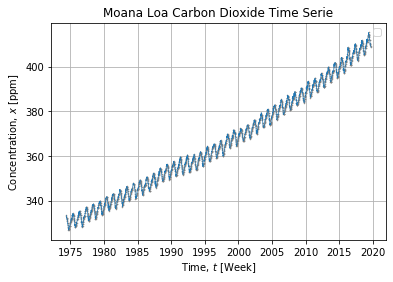

In [9]:
fig, axe = plt.subplots()
axe.plot(df.Original, '.', color='gray', markersize=1)
axe.plot(df.Interpolated, linewidth=0.6)
axe.set_title('Moana Loa Carbon Dioxide Time Serie')
axe.set_xlabel(r'Time, $t$ $[\mathrm{Week}]$')
axe.set_ylabel('Concentration, $x$ $[\mathrm{ppm}]$')
axe.grid()
axe.legend()

In [10]:
df.to_pickle('./data/MaunaLoa.picke')